In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests

In [65]:
# Mengambil data dari endpoint
url = "https://gist.githubusercontent.com/nadirbslmh/8fc9cc6cd5cbaaf5cbff63b090fb497e/raw/a7bf3e1edab88b04314a40a9de3ed744bc86d0e9/ecommerce.json"
response = requests.get(url)
data = response.json()

# Membaca data JSON ke dalam DataFrame
df = pd.DataFrame(data)

# Konversi kolom 'transaction_date' menjadi tipe data datetime
df['transaction_date'] = pd.to_datetime(df['transaction_date'], format='%d-%m-%Y')

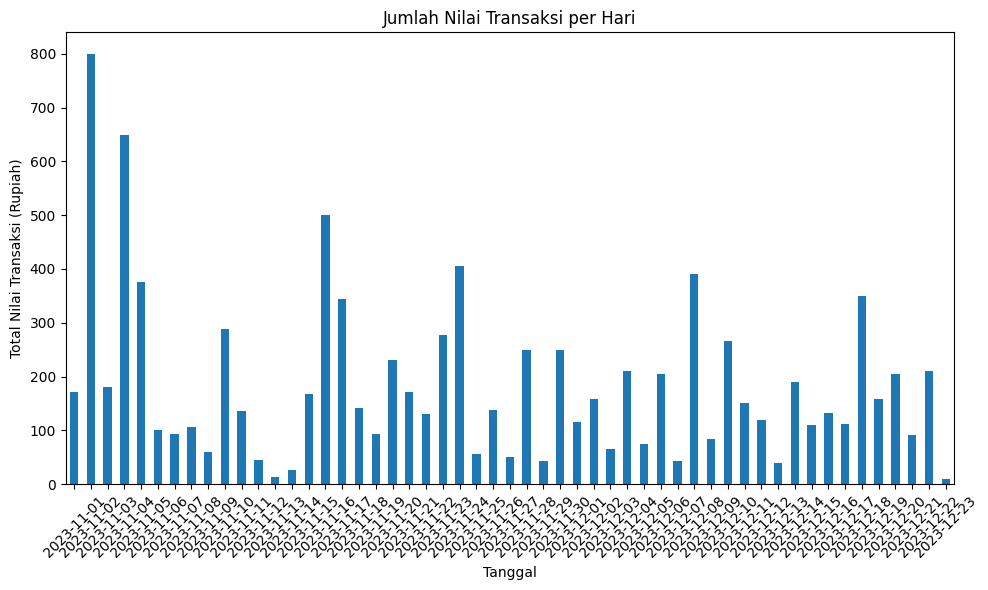

In [66]:
# Menghitung jumlah nilai transaksi per hari
daily_transaction = df.groupby(df['transaction_date'].dt.date)['transaction_amount'].sum()

# Plot jumlah nilai transaksi per hari
plt.figure(figsize=(10, 6))
daily_transaction.plot(kind='bar')
plt.title('Jumlah Nilai Transaksi per Hari')
plt.xlabel('Tanggal')
plt.ylabel('Total Nilai Transaksi (Rupiah)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

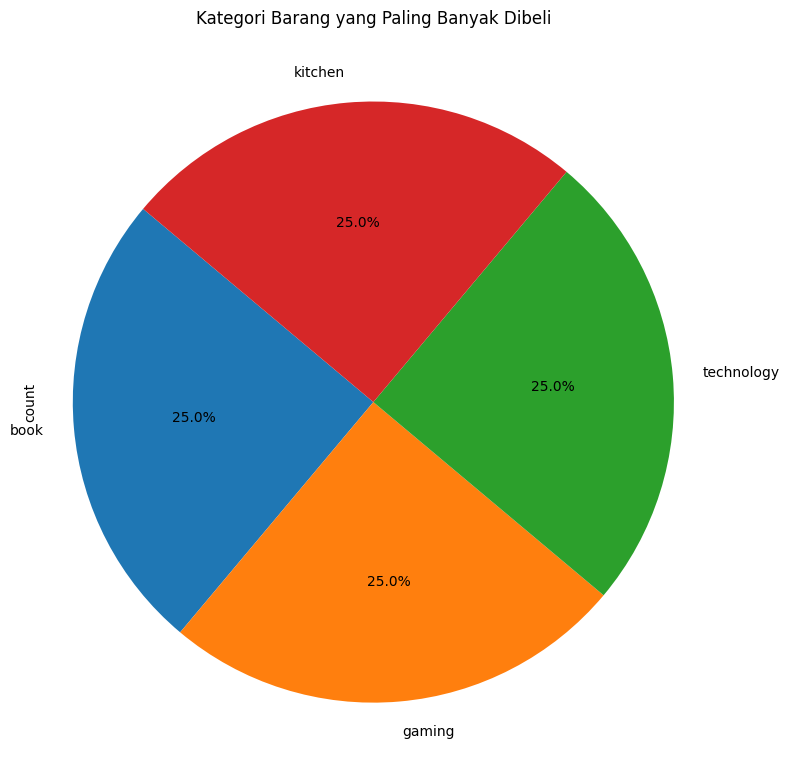

In [67]:
# Mengidentifikasi kategori barang yang paling banyak dibeli
most_bought_category = df['item_category'].value_counts()

# Plot kategori barang yang paling banyak dibeli menggunakan diagram lingkaran
plt.figure(figsize=(8, 8))
most_bought_category.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Kategori Barang yang Paling Banyak Dibeli')
plt.axis('equal')  # Memastikan diagram lingkaran berbentuk lingkaran
plt.tight_layout()
plt.show()

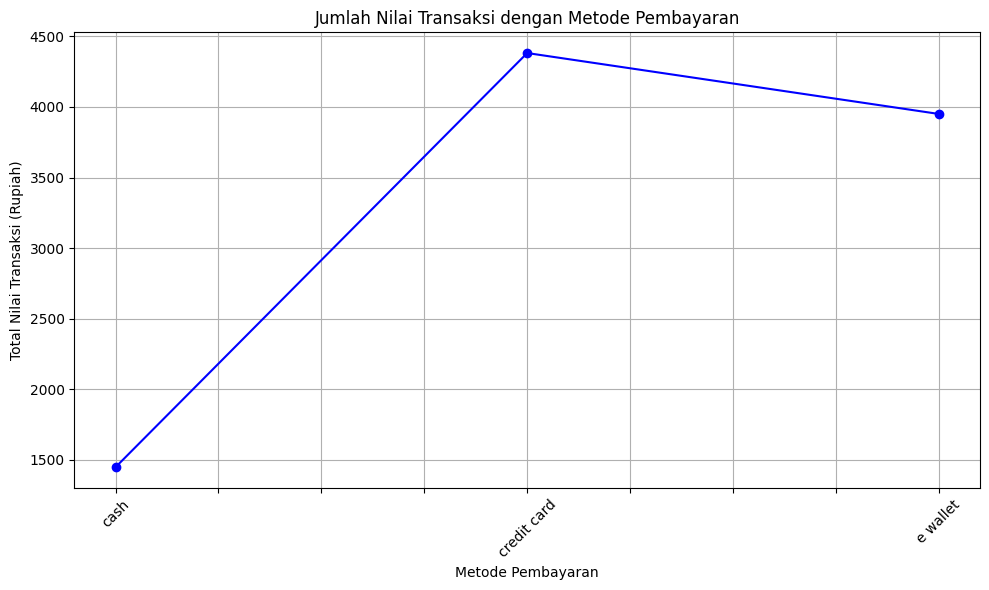

In [68]:
# Menghitung jumlah nilai transaksi dengan metode pembayaran e-wallet
payment_method_amount = df.groupby('payment_method')['transaction_amount'].sum()

# Plot grafik garis
plt.figure(figsize=(10, 6))
payment_method_amount.plot(kind='line', marker='o', color='b', linestyle='-')
plt.title('Jumlah Nilai Transaksi dengan Metode Pembayaran')
plt.xlabel('Metode Pembayaran')
plt.ylabel('Total Nilai Transaksi (Rupiah)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [69]:
# Menghitung nilai maksimal, minimal, dan median dari jumlah nilai transaksi
max_transaction = df['transaction_amount'].max()
min_transaction = df['transaction_amount'].min()
median_transaction = df['transaction_amount'].median()

# Menampilkan nilai maksimal, minimal, dan median dari jumlah nilai transaksi
print("Nilai maksimal transaksi:", max_transaction)
print("Nilai minimal transaksi:", min_transaction)
print("Nilai median transaksi:", median_transaction)

Nilai maksimal transaksi: 800.0
Nilai minimal transaksi: 5.0
Nilai median transaksi: 47.5
